# Chapter 03: Descriptive and Inferential Statistics

In [54]:
from collections import defaultdict
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import norm, t
import numpy as np
import random
import math

## Concepts

### Descriptive Statistics

#### Measures of Central Tendency

In [5]:
# Mean

sample = [1, 3, 2, 5, 7, 0, 2, 3]

mean = sum(sample) / len(sample)
print(mean)

2.875


In [6]:
# Weighted Mean

sample = [90, 80, 63, 87]
weights = [0.20, 0.20, 0.20, 0.40]

weighted_mean = sum(s * w for s, w in zip(sample, weights)) / sum(weights)
print(weighted_mean)

81.4


In [7]:
# Median

sample = [0, 1, 5, 7, 9, 10, 14]

def median(values):
    ordered = sorted(values)
    print(ordered)
    n = len(ordered)
    mid = int(n / 2) - 1 if n % 2 == 0 else int(n / 2)

    if n % 2 == 0:
        return (ordered[mid] + ordered[mid + 1]) / 2
    else:
        return ordered[mid]
    
sample_median = median(sample)
print(sample_median)

[0, 1, 5, 7, 9, 10, 14]
7


In [9]:
# Mode

sample = [1, 3, 2, 5, 7, 0, 2, 3]

def mode(values):
    counts = defaultdict(lambda: 0)

    for s in values:
        counts[s] += 1

    max_count = max(counts.values())
    modes = [v for v in set(values) if counts[v] == max_count]
    return modes

sample_mode = mode(sample)
print(sample_mode)

[2, 3]


In [10]:
# Population Variance

data = [0, 1, 5, 7, 9, 10, 14]

def variance(values):
    mean = sum(values) / len(values)
    _variance = sum((v - mean) ** 2 for v in values) / len(values)
    return _variance

data_variance = variance(data)
print(data_variance)

21.387755102040813


In [12]:
# Population Standard Deviation

def std_dev(values):
    return math.sqrt(variance(values))

data_standard_deviation = std_dev(data)
print(data_standard_deviation)

4.624689730353898


In [13]:
# Sample Variance

data = [0, 1, 5, 7, 9, 10, 14]

def sample_variance(values):
    mean = sum(values) / len(values)
    _variance = sum((v - mean) ** 2 for v in values) / (len(values) - 1)
    return _variance

data_sample_variance = sample_variance(data)
print(data_sample_variance)

24.95238095238095


In [14]:
# Sample Standard Deviation

def sample_std_dev(values):
    return math.sqrt(sample_variance(values))

data_sample_standard_deviation = sample_std_dev(data)
print(data_sample_standard_deviation)

4.99523582550223


#### Normal Distribution

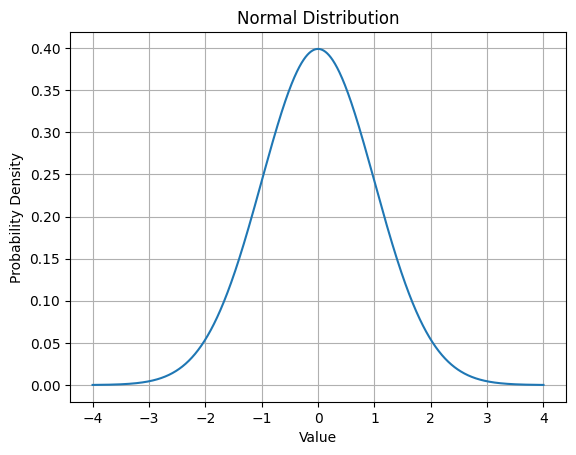

In [16]:
# Plotting Normal Distribution

mean = 0
std_dev = 1

# Generate data for the x-axis
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Calculate the y-values for the normal distribution
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Plot
plt.plot(x, y)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()


In [26]:
# Normal Distribution Function

def normal_pdf(x: float, mean: float, std_dev: float) -> float:
    return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

response_likelihood = normal_pdf(11.5, 12, 1)
print(response_likelihood)

0.3520653267642995


In [29]:
# Normal Cumulative Distribution

mean = 64.43
std_dev = 2.99

x = norm.cdf(64.43, mean, std_dev)
print(x)

0.5


In [30]:
# Getting a middle range using the CDF

mean = 64.43
std_dev = 2.99

x = norm.cdf(66, mean, std_dev) - norm.cdf(62, mean, std_dev)
print(x)

0.4920450147062894


In [31]:
# Inverse CDF

x = norm.ppf(.95, loc=64.43, scale=2.99)
print(x)

69.3481123445849


In [34]:
# Generating random numbers from a normal distribution

for i in range(0, 1000):
    random_p = random.uniform(0.0, 1.0)
    random_weight = norm.ppf(random_p, loc=64.43, scale=2.99)
    print(random_weight)

60.40516752774792
63.55000291751478
59.071358839652675
63.984412253567875
68.21051512255187
66.6578262745538
63.26924627814016
63.68327957260212
60.26029025518082
72.09293770049958
62.05367002683006
64.11526048135514
59.346716462684775
63.97131503279344
65.14523537040733
66.79794657800674
63.654001475515024
59.883814216577825
62.86204474000156
62.69681001044648
68.9839330914981
67.34923436504765
64.72144221662278
62.17423854141744
69.82622001375208
66.61182495587424
66.51416714722266
64.1974968219141
64.62078513403355
70.46688434025222
61.381670344223764
68.10363210544449
63.649453462664454
66.07678820889568
60.19811241091828
67.61050733560818
67.99177907490387
66.50309478242873
67.29309179878632
63.15834876960774
61.92244796961012
60.75430063488194
66.10556393871357
66.9046648819269
66.9790220481668
67.36487718279825
65.12874155874924
69.49067639295387
67.909153997372
63.47307179352268
65.49754929184438
64.3166170924246
62.59105433663768
65.12562090616754
69.35338715400474
63.77829437

In [36]:
# Turning Z-scores into x-values and visa versa

def z_score(x, mean , std):
    return (x - mean) / std

def z_to_x(z, mean, std):
    return (z * std) + mean

mean = 14000
std_dev = 3000
x = 15000

z = z_score(x, mean, std_dev)
back_to_x = z_to_x(z, mean, std_dev)

print("Z-Score: {}".format(z))
print("Back to X: {}".format(back_to_x))

Z-Score: 0.3333333333333333
Back to X: 15000.0


### Inferential Statstics

#### Central Limit Theorem

In [42]:
# Central Limit Theorem

sample_size = 31
sample_count = 1000

x_values = [(sum([random.uniform(0, 1) for i in range(sample_size)]) / sample_size) for _ in range(sample_count)]
y_values = [1 for _ in range(sample_count)]

px.histogram(x=x_values, y=y_values, nbins=20).show()

#### Confidence Intervals

In [43]:
# Retrieving a critical z-value

def critical_z_value(p):
    norm_dist = norm(loc=0, scale=1)
    left_tail_area = (1 - p) / 2
    upper_area = 1 - ((1 - p) / 2)
    return norm_dist.ppf(left_tail_area), norm_dist.ppf(upper_area)

print(critical_z_value(p=0.95))

(-1.959963984540054, 1.959963984540054)


In [45]:
# Calculating a confidence interval

def confidence_interval(p, sample_mean, sample_std, n):
    if n < 30:
        raise ValueError("Sample size must be greater than 30")
    
    lower, upper = critical_z_value(p)
    lower_ci = lower * (sample_std / math.sqrt(n))
    upper_ci = upper * (sample_std / math.sqrt(n))

    return sample_mean + lower_ci, sample_mean + upper_ci

print(confidence_interval(p=0.95, sample_mean=64.408, sample_std=2.05, n=31))

(63.68635915701992, 65.12964084298008)


#### Hypothesis Testing

In [47]:
# One tailed t-test, calculate critical x-value

# Cold has 18 day recovery, 1.5 std dev
mean = 18
std_dev = 1.5

# What x-value has 5% of area behind it?
x = norm.ppf(0.05, mean, std_dev)
print(x)

15.53271955957279


In [48]:
# One tailed t-test, calculate p-value

# Cold has 18 day recovery, 1.5 std dev
mean = 18
std_dev = 1.5

# Probability of 16 days or less
x = norm.cdf(16, mean, std_dev)
print(x)

0.09121121972586788


In [50]:
# Two tailed t-test, calculate critical x-values

# Cold has 18 day recovery, 1.5 std dev
mean = 18
std_dev = 1.5

# What x-value has 2.5% of area behind it?
x1 = norm.ppf(0.025, mean, std_dev)

# What x-value has 97.5% of area behind it?
x2 = norm.ppf(0.975, mean, std_dev)

print(x1)
print(x2)

15.060054023189918
20.93994597681008


In [53]:
# Two tailed t-test, calculate critical x-value

# Cold has 18 day recovery, 1.5 std dev
mean = 18
std_dev = 1.5

# Probability of 16 days or less
p1 = norm.cdf(16, mean, std_dev)

# Probability of 20 days or more
p2 = 1 - norm.cdf(20, mean, std_dev)

# P-value of both tails
p_value = p1 + p2
print(p_value)

0.18242243945173575


In [55]:
# Two tailed t-test, calculate critical z-scores for small sample using t-distribution

n = 25
lower = t.ppf(0.025, df=n-1)
upper = t.ppf(0.975, df=n-1)

print(lower, upper)

-2.063898561628021 2.0638985616280205


## Code Exercises

In [ ]:
# Exercise 3-1 (Calculate Mean & Standard Deviation)

In [ ]:
# Exercise 3-2 (Normal Distribution)

In [ ]:
# Exercise 3-3 (Confidence Intervals)

In [ ]:
# Exercise 3-4 (Hypothesis Testing, two tailed t-test)